<a href="https://colab.research.google.com/github/Polydany0/Digital-Image-Processing/blob/main/ViT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Явная установка совместимых версий библиотек
!pip install -U torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!pip install -U transformers pillow requests matplotlib

Looking in indexes: https://download.pytorch.org/whl/cu118


In [2]:
# Импорт необходимых библиотек
from transformers import ViTImageProcessor, ViTForImageClassification
from PIL import Image
import requests
import matplotlib.pyplot as plt
import torch
import random
import numpy as np

In [3]:
# Список API для случайных изображений
IMAGE_API_SOURCES = [
    "https://source.unsplash.com/random/600x600/?animal",
    "https://source.unsplash.com/random/600x600/?nature",
    "https://source.unsplash.com/random/600x600/?city",
    "https://source.unsplash.com/random/600x600/?technology"
]

In [4]:
def get_random_image():
    """Загружает случайное изображение с различных API"""
    source = random.choice(IMAGE_API_SOURCES)

    try:
        response = requests.get(source, timeout=10)
        return Image.open(BytesIO(response.content))
    except Exception as e:
        print(f"⚠️ Ошибка при загрузке из {source}: {e}")
        return Image.open(requests.get(
            "http://images.cocodataset.org/val2017/000000039769.jpg",
            stream=True
        ).raw)

In [5]:
# Загрузка модели и процессора ViT
print("\n🔄 Загрузка модели ViT-base-patch16-224...")
processor = ViTImageProcessor.from_pretrained('google/vit-base-patch16-224')
model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')
print("✅ Модель успешно загружена!")

# Получение информации о модели
print(f"\nℹ️ Модель: {model.config.model_type}")
print(f"ℹ️ Размер изображения: {processor.size}")
print(f"ℹ️ Размер патча: {model.config.patch_size}")
print(f"ℹ️ Количество классов: {model.config.num_labels}")


🔄 Загрузка модели ViT-base-patch16-224...


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


✅ Модель успешно загружена!

ℹ️ Модель: vit
ℹ️ Размер изображения: {'height': 224, 'width': 224}
ℹ️ Размер патча: 16
ℹ️ Количество классов: 1000



🚀 Обработка изображения 1/1...
⚠️ Ошибка при загрузке из https://source.unsplash.com/random/600x600/?city: name 'BytesIO' is not defined
  🎯 Предсказание: Egyptian cat
  🔒 Уверенность: 93.74%


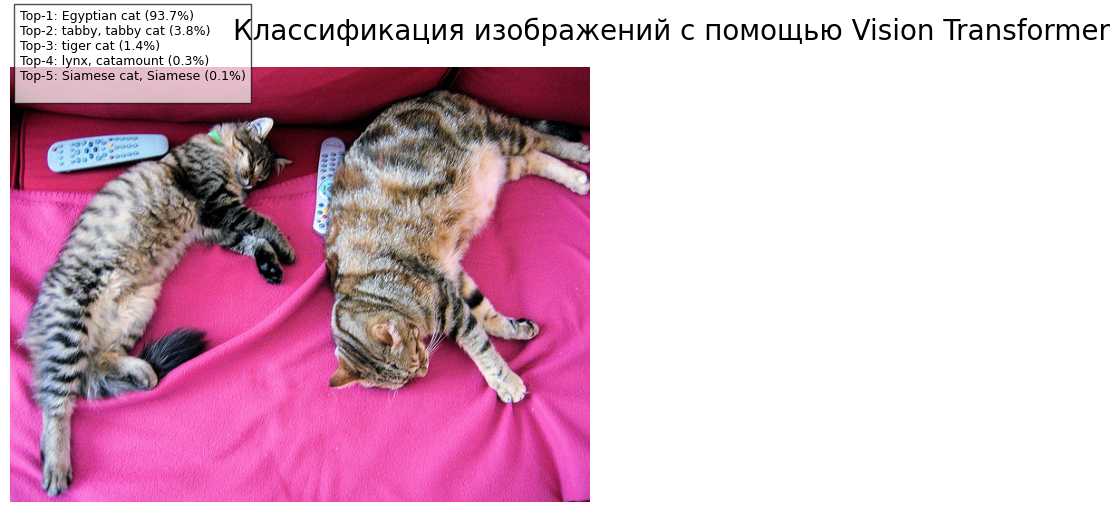


✅ Классификация завершена!


In [8]:
# Создание сетки изображений
num_images = 1
plt.figure(figsize=(15, 10))
plt.suptitle('Классификация изображений с помощью Vision Transformer', fontsize=20, y=0.95)

for i in range(num_images):
    # Загрузка и обработка изображения
    print(f"\n🚀 Обработка изображения {i+1}/{num_images}...")
    image = get_random_image()

    # Преобразование в RGB если необходимо
    if image.mode != 'RGB':
        image = image.convert('RGB')

    # Предобработка и классификация
    inputs = processor(images=image, return_tensors="pt")
    with torch.no_grad():
        outputs = model(**inputs)

    # Обработка результатов
    logits = outputs.logits
    probabilities = torch.nn.functional.softmax(logits, dim=-1)[0]
    top5_probs, top5_indices = torch.topk(probabilities, 5)

    predicted_idx = logits.argmax(-1).item()
    predicted_label = model.config.id2label[predicted_idx]
    confidence = probabilities[predicted_idx].item() * 100

    print(f"  🎯 Предсказание: {predicted_label}")
    print(f"  🔒 Уверенность: {confidence:.2f}%")

    # Отображение в сетке
    ax = plt.subplot(2, 2, i+1)
    plt.imshow(image)

    # Отображение топ-5 предсказаний
    info_text = f"Top-1: {predicted_label} ({confidence:.1f}%)\n"
    for j in range(4):  # Покажем еще 4 класса из топ-5
        info_text += f"Top-{j+2}: {model.config.id2label[top5_indices[j+1].item()]} ({top5_probs[j+1].item()*100:.1f}%)\n"

    plt.text(10, 30, info_text,
             bbox=dict(facecolor='white', alpha=0.7),
             fontsize=9)

    plt.axis('off')

plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.show()
print("\n" + "="*50)
print("✅ Классификация завершена!")
print("="*50)

Ну явно же не египетский кот...

In [7]:
# Дополнительная информация о ViT
print("\n🌟 Основные характеристики Vision Transformer (ViT):")
print("- Разделение изображения на патчи фиксированного размера")
print("- Линейное преобразование патчей в эмбеддинги")
print("- Добавление позиционных энкодингов")
print("- Обработка последовательности трансформер-энкодерами")
print("- Использование [CLS] токена для классификации")
print(f"- Размерность эмбеддингов: {model.config.hidden_size}")
print(f"- Количество трансформер-блоков: {model.config.num_hidden_layers}")
print(f"- Количество голов внимания: {model.config.num_attention_heads}")


🌟 Основные характеристики Vision Transformer (ViT):
- Разделение изображения на патчи фиксированного размера
- Линейное преобразование патчей в эмбеддинги
- Добавление позиционных энкодингов
- Обработка последовательности трансформер-энкодерами
- Использование [CLS] токена для классификации
- Размерность эмбеддингов: 768
- Количество трансформер-блоков: 12
- Количество голов внимания: 12
